In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import Markdown
from medpredictor import Graph, Config, DataFrameOperations, Utils, MetricsDisplay

### **Setting up the dataframe**

In [2]:
df = pd.read_csv(Config.data_cleaned_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  object 
 1   HighBP                253680 non-null  object 
 2   HighChol              253680 non-null  object 
 3   CholCheck             253680 non-null  object 
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  object 
 6   Stroke                253680 non-null  object 
 7   HeartDiseaseorAttack  253680 non-null  object 
 8   PhysActivity          253680 non-null  object 
 9   Fruits                253680 non-null  object 
 10  Veggies               253680 non-null  object 
 11  HvyAlcoholConsump     253680 non-null  object 
 12  AnyHealthcare         253680 non-null  object 
 13  NoDocbcCost           253680 non-null  object 
 14  GenHlth               253680 non-null  object 
 15  

In [3]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No diabetes,Yes,Yes,Yes,40.0,Yes,No,No,No,No,...,Yes,No,Poor,18.0,15.0,Yes,Female,60 to 64,High school graduate,$15k to less than $20k
1,No diabetes,No,No,No,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,50 to 54,College graduate,"Less than $10,000"
2,No diabetes,Yes,Yes,Yes,28.0,No,No,No,No,Yes,...,Yes,Yes,Poor,30.0,30.0,Yes,Female,60 to 64,High school graduate,"$75,000 or more"
3,No diabetes,Yes,No,Yes,27.0,No,No,No,Yes,Yes,...,Yes,No,Very good,0.0,0.0,No,Female,70 to 74,Some high school,$35k to less than $50k
4,No diabetes,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,...,Yes,No,Very good,3.0,0.0,No,Female,70 to 74,Some college or technical school,$20k to less than $25k


In [4]:
df.describe()

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


From this numeric features we can get this insights:

**Body Mass Index (BMI)**
* The mean for this index is ~28.38.
* The standard deviation for this feature is ~6.61. As we can see, this is a low value, so data's dispersion is low too.
* The minimum index registered in this dataset is 12. This indicates us that at least one respondent has underweight,  which might require medical attention.
* The maximum index registered in this dataset is 98. This is a less common index's value that could be due to errors in data entry.
* The 50% of the respondets answered 27 as theirs body mass index, which is around the upper limit of the 'normal' BMI range  taking into account respondent's age and sex.
* The 75% of the respondents ansewered 31 as theirs body mass index. According to respondent's age and sex, this could be dangerous. A BMI of 31 falls within the overweight or obese category, which can increase health risks.

**Days of poor mental health (MetHlth)**
* The mean for this feature is ~3.18. 
* The standard deviation for this feature is ~7.41, indicating high variability in the number of poor mental health days among respondents.
* The high standard deviation suggests that while many respondents have few poor mental health days, a subset experiences significantly more, potentially requiring targeted mental health interventions.
* The minimum number of days registered in this dataset is 0. This indicates that at least one respondent is in good mental health.
* The maximum number of days registerd in this dataset is 30. This indicates that at least one person needs to take care of his/her mental health. 
* 75% of the respondents reported having 2 or fewer days of bad mental health.. This is very positive, because it indicates that the respondents are in good mental health.

**Physical illness or injury days in past 30 days (PhysHlth)**
* The mean of 4 days suggests that, on average, respondents experienced physical illness or injury for about 4 days in the past month, which might be a concern depending on the nature and severity of these conditions.
* The standard deviation for this feature is ~8.72. As we can see, this is a high value, so data's dispersion is high too.
* The minimum number of days registered in this dataset is 0. This positive, because at least one respondent didn't suffer any illness or injury.
* The maximum number of days registered in this dataset is 30. This indicates that at least one person suffered an illness or injury for 30 days.
* 75% of the respondents reported experiencing 3 or fewer days of physical illness or injury. 

### **Utils**

In [27]:
# code section to add new functions

def show_metric(name_metric, metric):
    display(Markdown(f"{name_metric}: {metric}%"))
    return

def sex_metrics(df, column_1, column_2, values_filter_order):
    values_subset = set(list(df[column_1].unique()))
    metrics_female = {}
    metrics_male = {}
    total_registers = int(df.value_counts().sum())

    df_o = DataFrameOperations(df=df)
    sex_column, filter_column = df_o.column_identifier(column_1=column_1, column_2=column_2, values_subset=values_subset)

    if column_1 not in df.columns or column_2 not in df.columns:
        raise ValueError(f"The columns '{column_1}' or '{column_2}' don't exist in the DataFrame.")

    values_sex = list(df[sex_column].unique())
    values_filter = sorted(list(df[filter_column].unique()), key=lambda x: values_filter_order.index(x))

    for value_sex in values_sex:
        for value_filter in values_filter:
            result = df_o.filter_group_registers(column_1=sex_column, 
                                                 column_2=filter_column, 
                                                 condition=((df[sex_column] == value_sex) & (df[filter_column] == value_filter)))
            percentaje = Utils().calc_percentajes(value=result.get('result'), total=total_registers)
            if value_sex == 'Female':
                metrics_female.update({value_filter:round(float(percentaje), 2)})
            if value_sex == 'Male':
                metrics_male.update({value_filter:round(float(percentaje), 2)})

    return metrics_female, metrics_male


def health_status_metrics(df, column_1, column_2, values_status_order, values_filter_order):
    values_subset = set(list(df[column_1].unique()))
    metrics_excellent = {}
    metrics_v_good = {}
    metrics_good = {}
    metrics_fair = {}
    metrics_poor = {}
    total_registers = int(df.value_counts().sum())

    df_o = DataFrameOperations(df)
    status_column, filter_column = df_o.column_identifier(column_1=column_1, column_2=column_2, values_subset=values_subset)

    if column_1 not in df.columns or column_2 not in df.columns:
        raise ValueError(f"The columns '{column_1}' or '{column_2}' don't exist in the DataFrame.")
    
    values_states = sorted(list(df[status_column].unique()), key=lambda x: values_status_order.index(x))
    values_filter = sorted(list(df[filter_column].unique()), key=lambda x: values_filter_order.index(x))

    for value_state in values_states:
        for value_filter in values_filter:
            result = df_o.filter_group_registers(column_1=status_column,
                                                 column_2=filter_column,
                                                 condition=((df[status_column] == value_state) & (df[filter_column] == value_filter)))
            percentaje = Utils().calc_percentajes(value=result.get('result'), total=total_registers)
            if value_state == 'Excellent':
                metrics_excellent.update({value_filter:round(float(percentaje), 2)})
            elif value_state == 'Very good':
                metrics_v_good.update({value_filter:round(float(percentaje), 2)})
            elif value_state == 'Good':
                metrics_good.update({value_filter:round(float(percentaje), 2)})
            elif value_state == 'Fair':
                metrics_fair.update({value_filter:round(float(percentaje), 2)})
            elif value_state == 'Poor':
                metrics_poor.update({value_filter:round(float(percentaje), 2)})

    return metrics_excellent, metrics_v_good, metrics_good, metrics_fair, metrics_poor

### **Analysis respondents' demographic features**

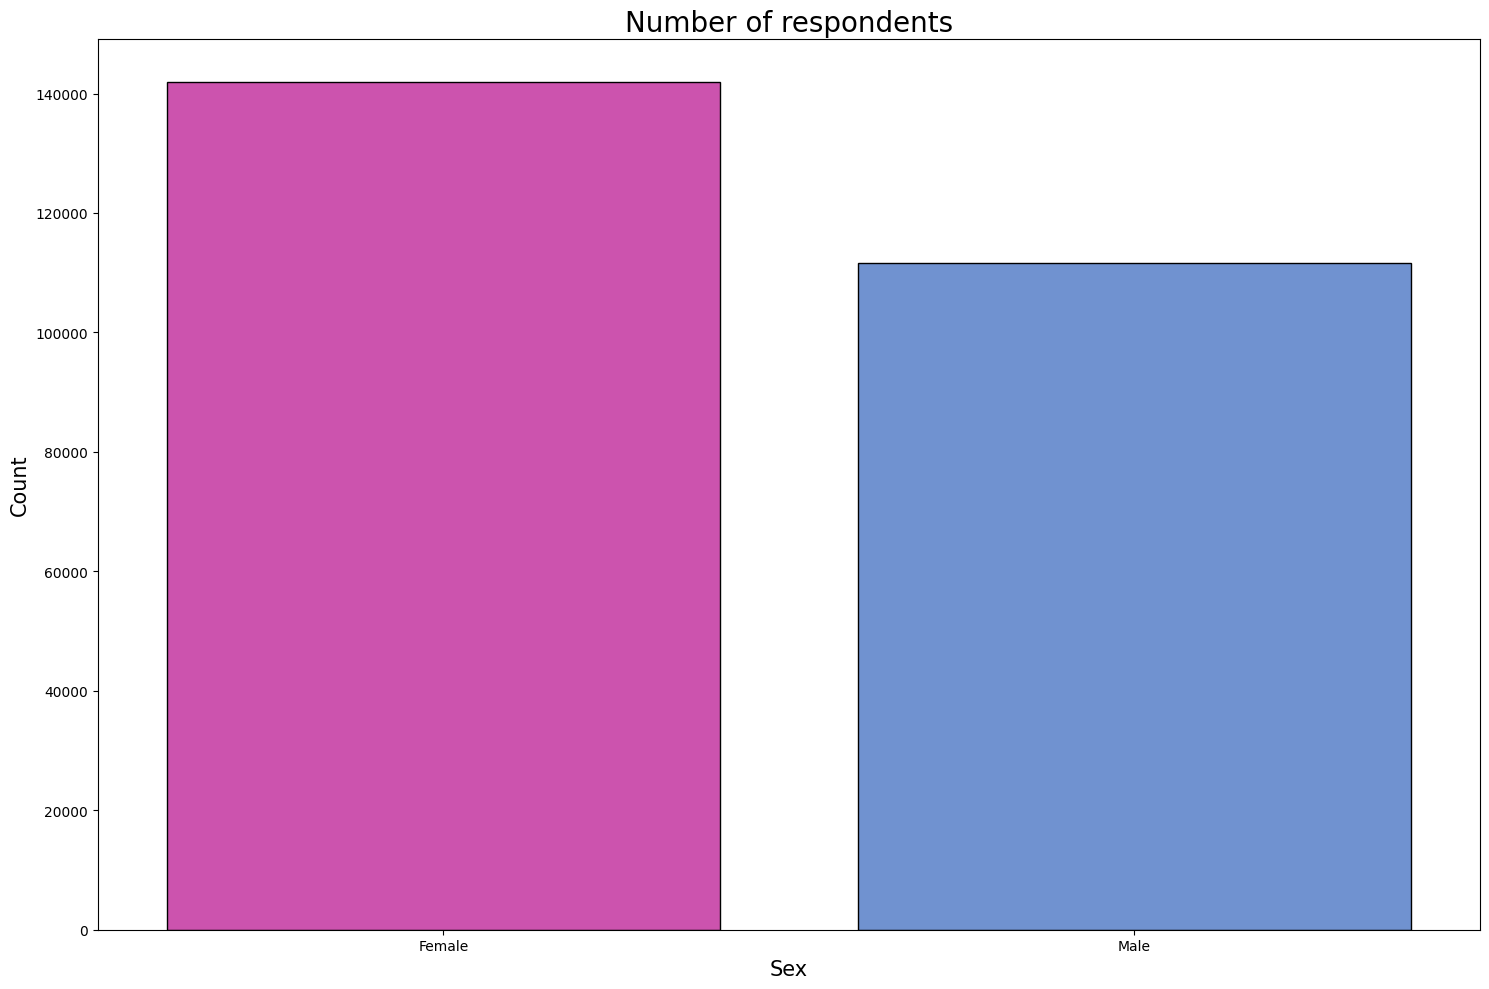

In [6]:
values_sex = df['Sex'].value_counts().reset_index()
values_sex.columns = ['Sex', 'Count']
colors = ['#E03FB8','#608DE0']
title = "Number of respondents"
x_label = "Sex"
y_label = "Count"

graph_sex = Graph(colors=colors, 
              graph_title=title, 
              xlabel_name=x_label, 
              ylabel_name=y_label)

graph_sex.bar_plot_sns(x='Sex', y='Count', data=values_sex, hue='Sex')


To establish a starting point for this study, the number of respondents has been investigated by gender. As can be seen, the dataset has more female respondents than male respondents. This indicates that the feature "Sex" is unbalanced.

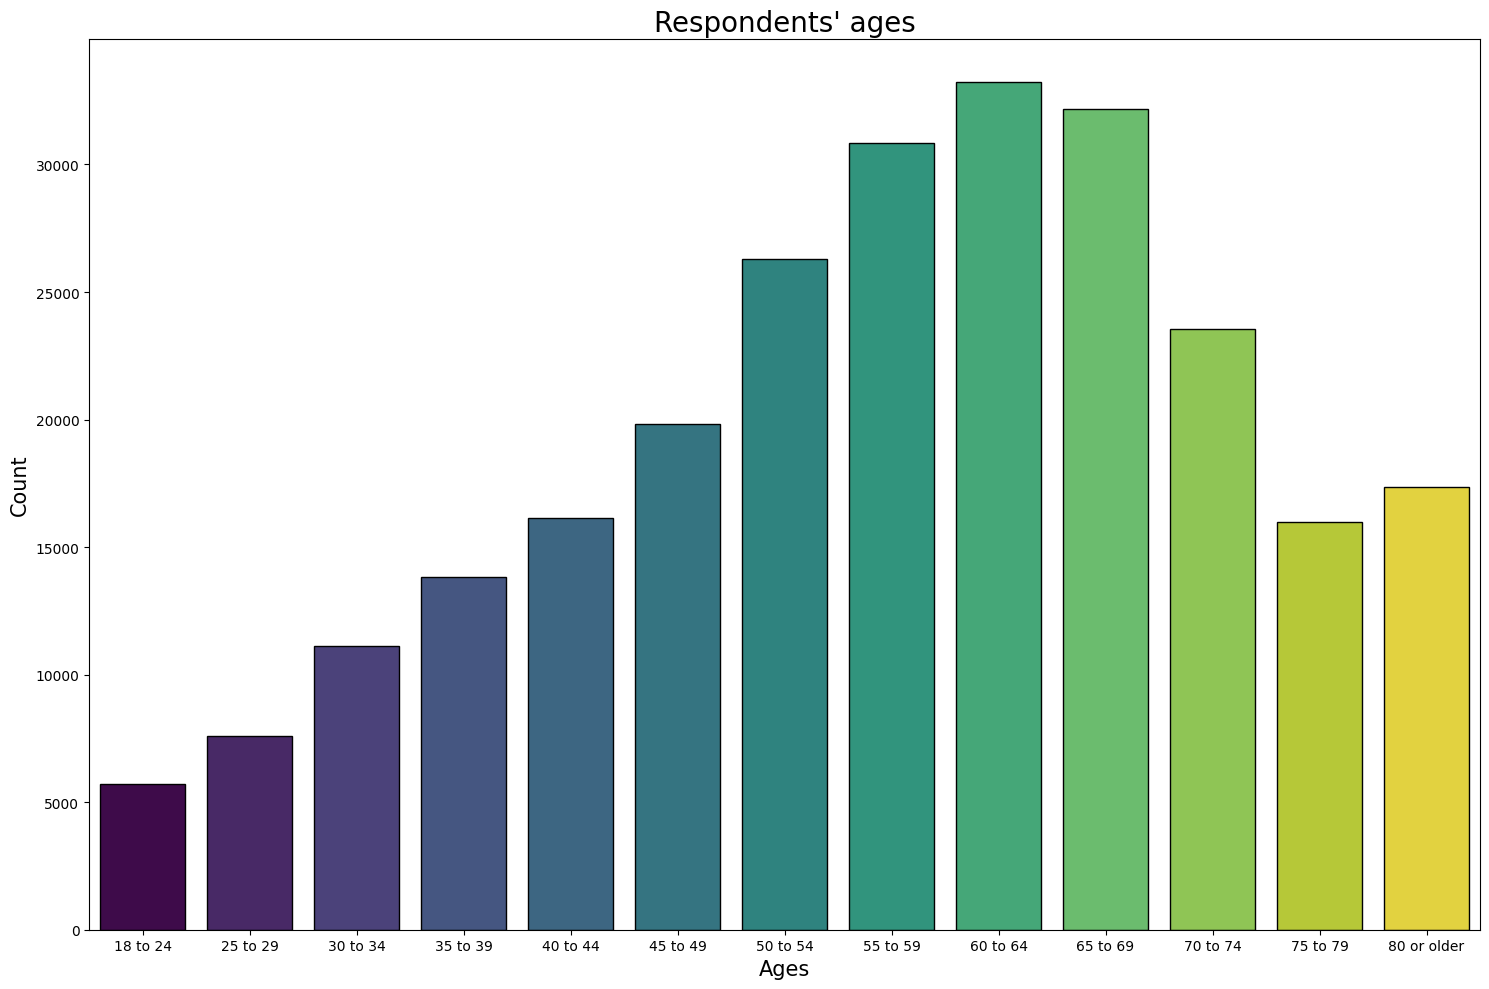

In [7]:
age_order = ['18 to 24','25 to 29', '30 to 34', '35 to 39',
                '40 to 44', '45 to 49', '50 to 54', '55 to 59',
                '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 or older']

values_age = df['Age'].value_counts().reset_index()
values_age.columns = ['Ages', 'Count']
values_age['Ages'] = pd.Categorical(values_age['Ages'], categories=age_order, ordered=True)
values_age = values_age.sort_values('Ages')

title = "Respondents' ages"
x_label = "Ages"
y_label = "Count"

cmap = plt.get_cmap('viridis', len(age_order))
hex_colors = [mcolors.to_hex(cmap(i)) for i in range(len(age_order))]
dict_colors = dict(zip(age_order, hex_colors))
colors = list(dict_colors.values())

graph_age = Graph(graph_title=title,
                  xlabel_name=x_label,
                  ylabel_name=y_label,
                  colors=colors)

graph_age.bar_plot_sns(x='Ages', y='Count', hue='Ages', data=values_age)


In this bar chart we can see that the majority of respondents are adults between the ages of 50 and 74. This could indicate a clear bias in the target audience of the survey.

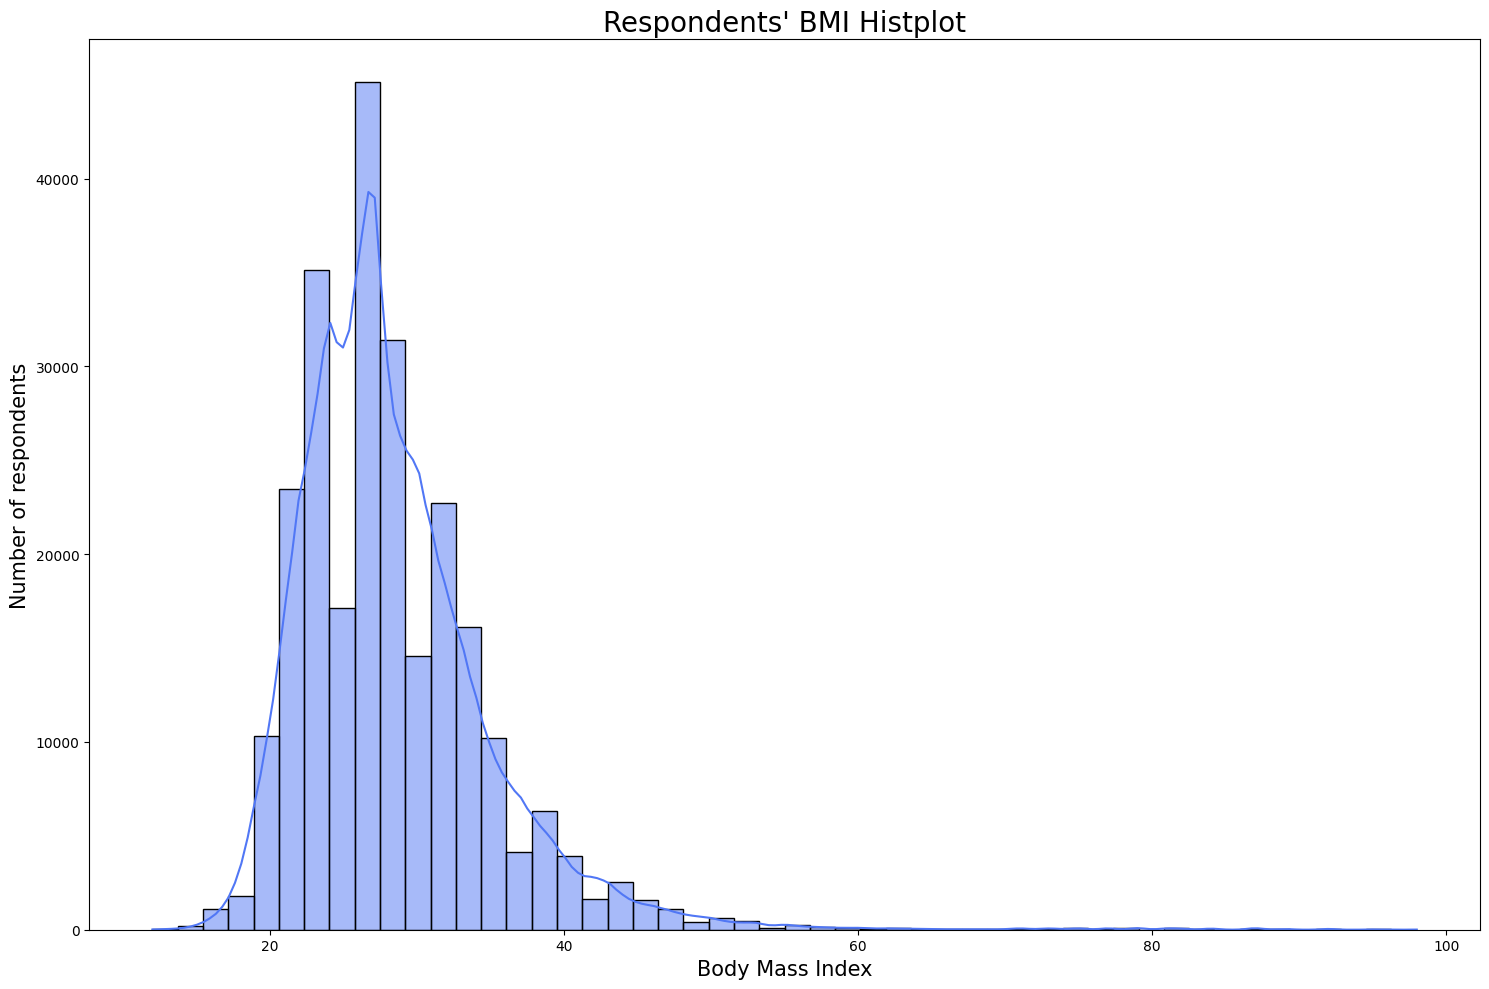

In [8]:
title = "Respondents' BMI Histplot"
x_label = "Body Mass Index"
y_label = "Number of respondents"
color = '#5177F5'

graph_bmi = Graph(graph_title=title, 
                  xlabel_name=x_label, 
                  ylabel_name=y_label,
                  colors=color)

graph_bmi.hist_plot_sns(x='BMI', data=df, kde=True)

From the graph presented, an asymmetrical distribution of the data towards the left can be observed. Furthermore, if we pay attention to the index interval whose lower limit is 20 and upper limit 40, we can see that the highest number of values is concentrated.

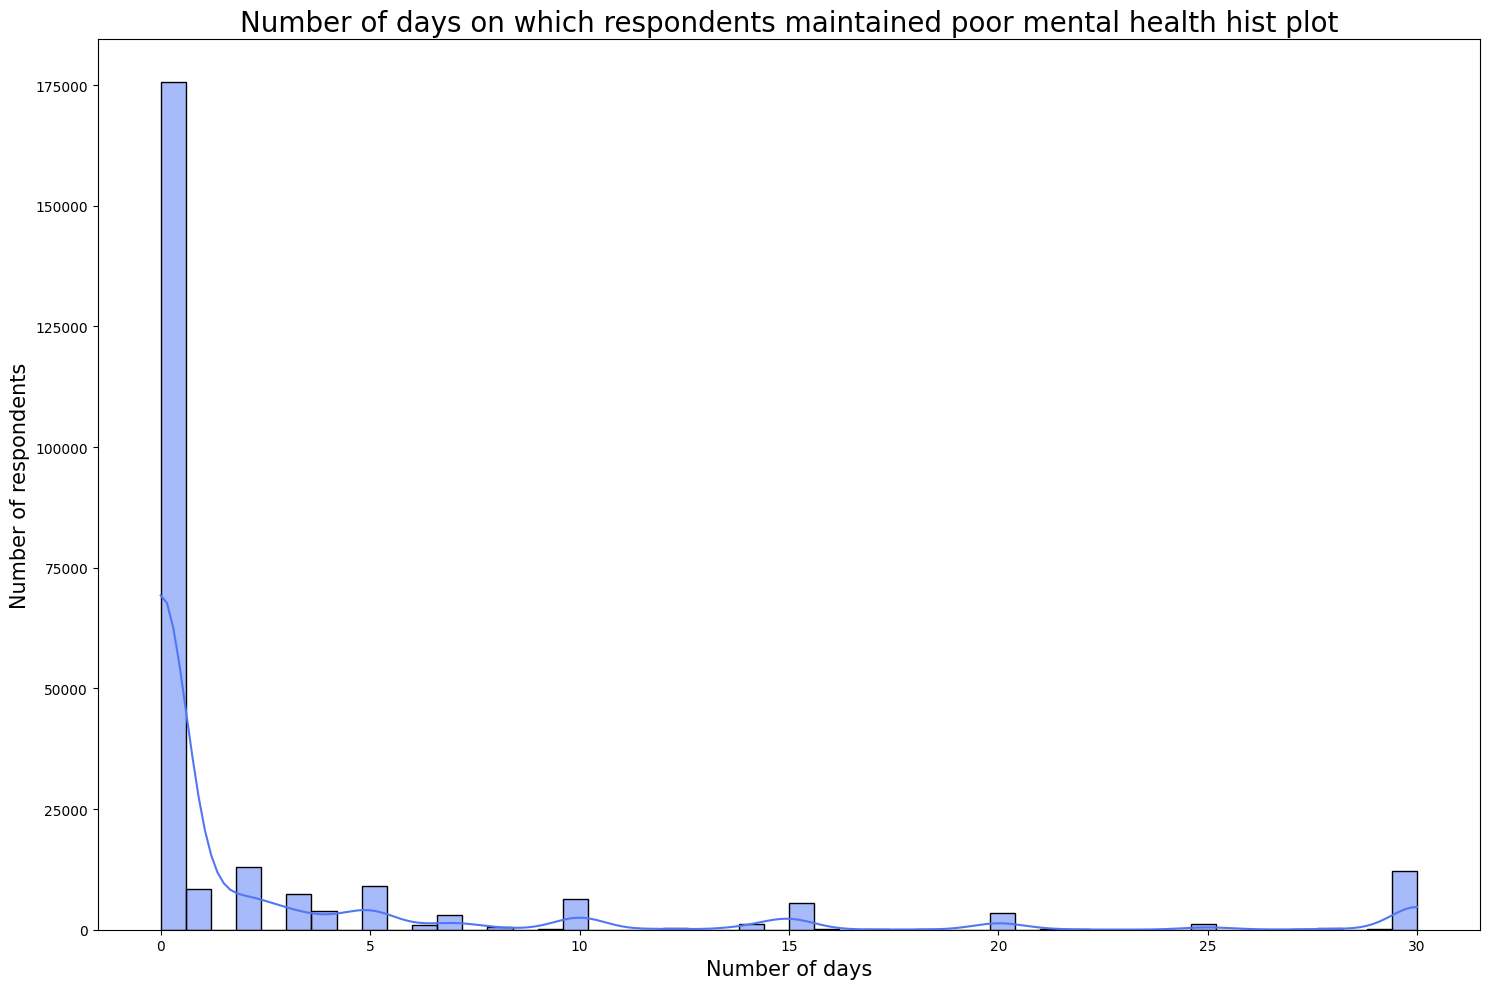

In [9]:
title = "Number of days on which respondents maintained poor mental health hist plot"
x_label = "Number of days"
y_label = "Number of respondents"
color = '#5177F5'

graph_days_mph = Graph(graph_title=title, 
                       xlabel_name=x_label, 
                       ylabel_name=y_label,
                       colors=color)

graph_days_mph.hist_plot_sns(x='MentHlth', data=df, kde=True)

This histogram shows the distribution of the number of days on which respondents reported having poor mental health. As we can see, data's distribution is asymetrical towards the left.

When analysed, it shows that the majority of respondents did not experience days with mental health problems. However, it is relevant to note that 75% of the respondents reported at least one day with poor mental health, reaching a maximum of 30 days.

In [10]:
display(Markdown("### **Respondents' annual income**"))
values_income_table = df['Income'].value_counts().reset_index(name='count')
values_income_table.columns = ['Annual income', 'Number of registers']
values_income_table['Annual income'] = pd.Categorical(values_income_table['Annual income'])
values_income_table['Annual income'] = values_income_table['Annual income'].str.replace(r'\$', '\\$', regex=True)
values_income_table

### **Respondents' annual income**

,Annual income,Number of registers
0,"\$75,000 or more",90385
1,\$50k to less than \$75k,43219
2,\$35k to less than \$50k,36470
3,\$25k to less than \$35k,25883
4,\$20k to less than \$25k,20135
5,\$15k to less than \$20k,15994
6,\$10k to less than \$15k,11783
7,"Less than \$10,000",9811


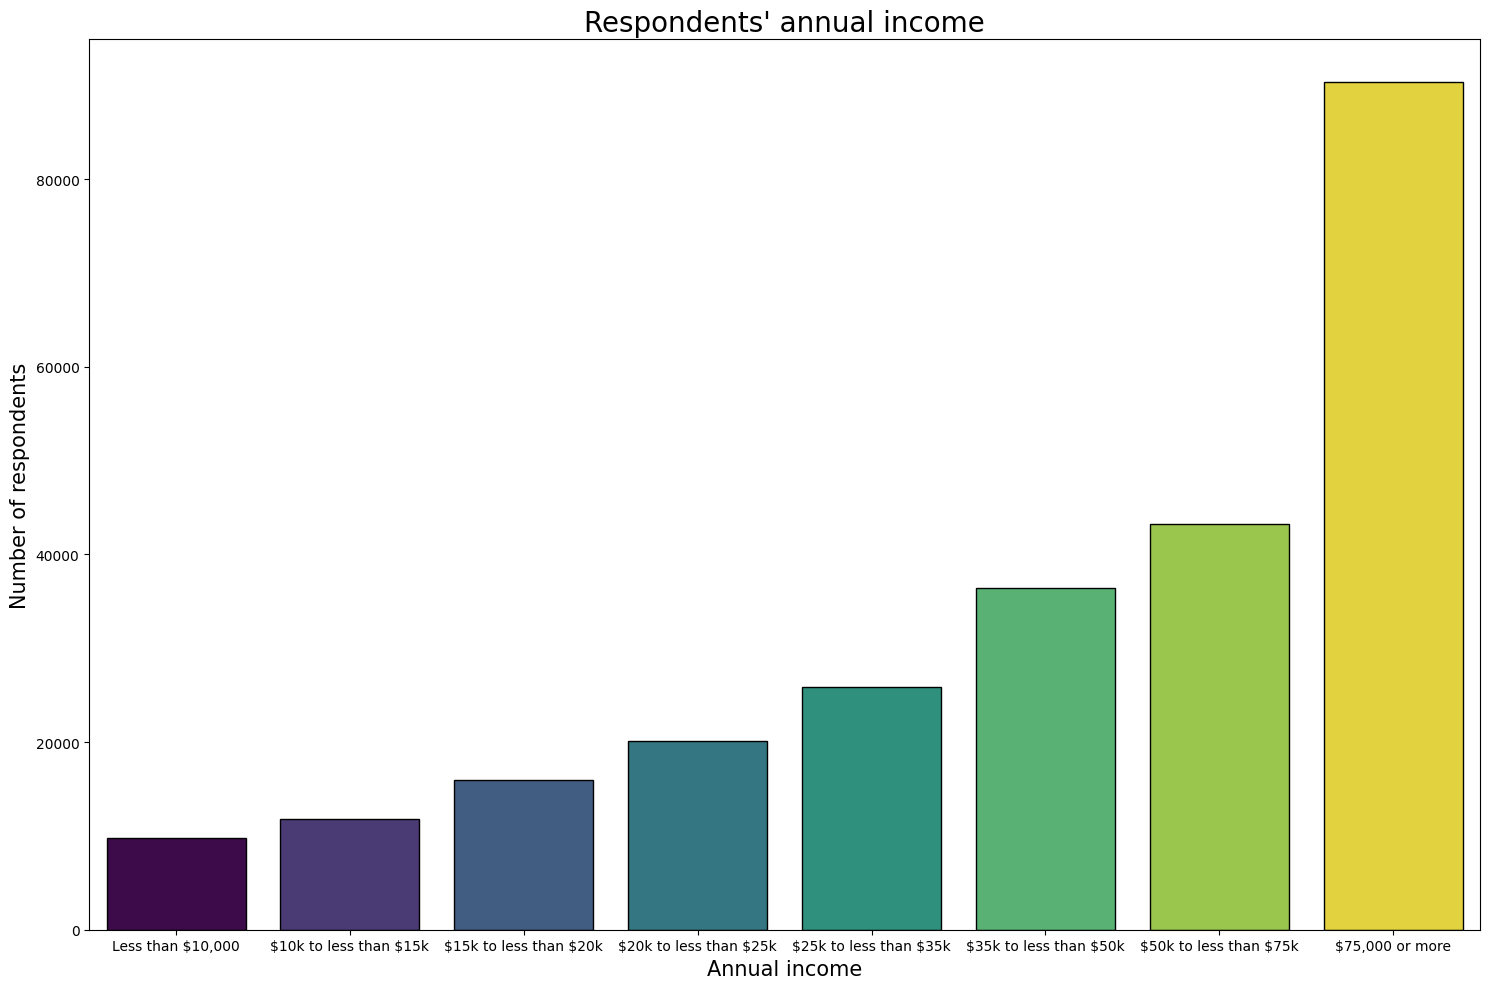

In [11]:
income_order = ['Less than $10,000', 
                '$10k to less than $15k', 
                '$15k to less than $20k', 
                '$20k to less than $25k',
                '$25k to less than $35k', 
                '$35k to less than $50k', 
                '$50k to less than $75k', 
                '$75,000 or more']

values_income = df['Income'].value_counts().reset_index(name='count')
values_income.columns = ['Annual income', 'Number of registers']
values_income['Annual income'] = pd.Categorical(values_income['Annual income'], categories=income_order, ordered=True)
values_income['Annual income'] = values_income['Annual income'].str.replace(r'\$', '\\$', regex=True)
values_income = values_income.sort_values('Annual income')

title = "Respondents' annual income"
x_label = "Annual income"
y_label = "Number of respondents"

cmap = plt.get_cmap('viridis', len(income_order))
hex_colors = [mcolors.to_hex(cmap(i)) for i in range(len(income_order))]
dict_colors = dict(zip(income_order, hex_colors))
colors = list(dict_colors.values())


graph_income = Graph(graph_title=title,
                     xlabel_name=x_label,
                     ylabel_name=y_label,
                     colors=colors)

graph_income.bar_plot_sns(x='Annual income', y='Number of registers', hue='Annual income', data=values_income)

Within this bar chart that provides information about the annual income of respondents, we can see that a large proportion of respondents have annual incomes in excess of $75,000 (90385 respondents). Furthermore, it is worth noting that as annual incomes grow, so do the records of annual incomes, which could indicate a clear bias in the survey.

In [12]:
display(Markdown("### **Respondents' education**"))
values_education = df['Education'].value_counts().reset_index(name='count')
values_education.columns = ['Education', 'Number of registers']
values_education

### **Respondents' education**

,Education,Number of registers
0,College graduate,107325
1,Some college or technical school,69910
2,High school graduate,62750
3,Some high school,9478
4,Elementary,4043
5,Never attended school or only kindergarten,174


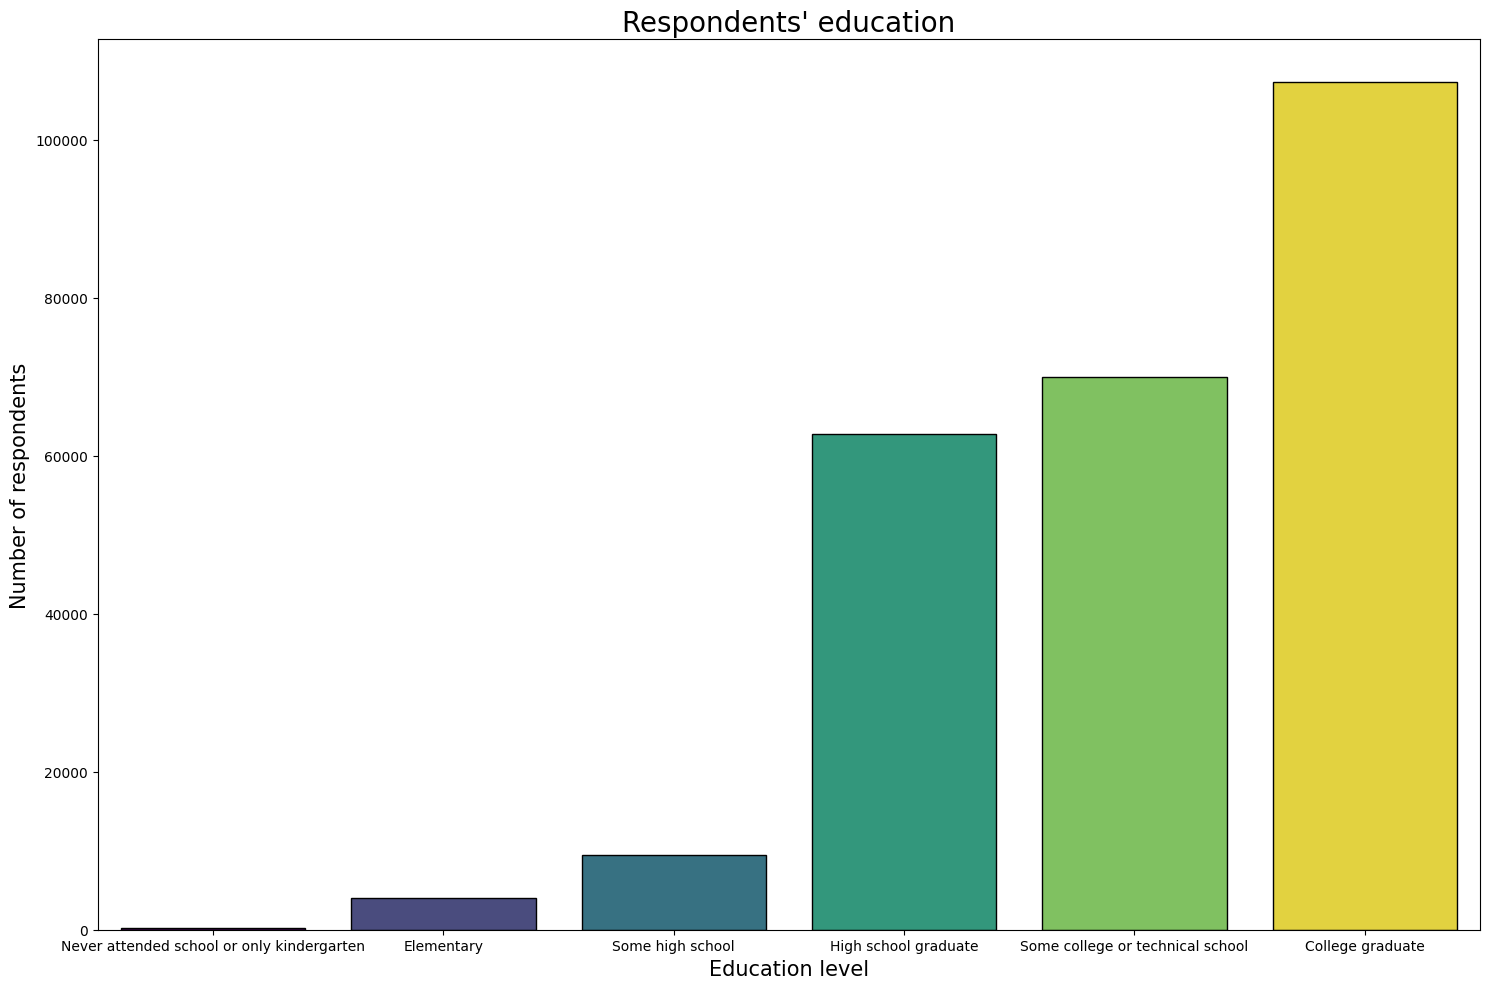

In [13]:
education_order = ['Never attended school or only kindergarten',
                   'Elementary',
                   'Some high school',
                   'High school graduate', 
                   'Some college or technical school',
                   'College graduate']

values_education['Education'] = pd.Categorical(values_education['Education'], categories=education_order, ordered=True)
values_education = values_education.sort_values('Education')

title = "Respondents' education"
x_label = "Education level"
y_label = "Number of respondents"

cmap = plt.get_cmap('viridis', len(education_order))
hex_colors = [mcolors.to_hex(cmap(i)) for i in range(len(education_order))]
dict_colors = dict(zip(education_order, hex_colors))
colors = list(dict_colors.values())

graph_education = Graph(graph_title=title, 
                        xlabel_name=x_label, 
                        ylabel_name=y_label, 
                        colors=colors)

graph_education.bar_plot_sns(x='Education', y='Number of registers', hue='Education', data=values_education)


Within this bar plot, we can see that the majority of the study population has secondary and university level studies. This can be seen in the number of registers which exist for the classes "High school graduate" (62750), "Some college or technical school" (69910) y "College graduate" (107325). However, it should be noted that this indicates a clear bias within the survey towards educated people.

### **Analysis respondents' habits**

In [14]:
df = DataFrameOperations(df).create_combined_column(
                                                new_column_name='eating_habits',
                                                column_1='Fruits',
                                                column_2='Veggies',
                                                function=Utils.good_habits_labeling)

df['eating_habits'].value_counts().reset_index(name='Count')

,eating_habits,Count
0,Eats fruits and vegetables,142712
1,Only eats vegetables,63129
2,Does not eat fruits neither vegetables,29653
3,Only eats fruits,18186


In [15]:
df = DataFrameOperations(df).create_combined_column(new_column_name='bad_habits',
                                                    column_1='HvyAlcoholConsump',
                                                    column_2='Smoker',
                                                    function=Utils.bad_habits_labeling)
df['bad_habits'].value_counts().reset_index(name='Count')

,bad_habits,Count
0,Does not consume alcohol neither tobacco,136268
1,Only consume tobacco,103156
2,Consume alcohol and tobacco,9267
3,Only consume alcohol,4989


### **Respondents who eat fruits and vegetables**

Total: 56.26%

Women: 33.96%

Men: 22.3%

### **Respondents who eat only fruits**

Total: 7.17%

Women: 3.72%

Men: 3.45%

### **Respondents who only eats vegetables**

Total: 24.88%

Women: 12.71%

Men: 12.17%

### **Respondents who don't eat fruits neither vegetables**

Total: 11.69%

Women: 5.58%

Men: 6.11%

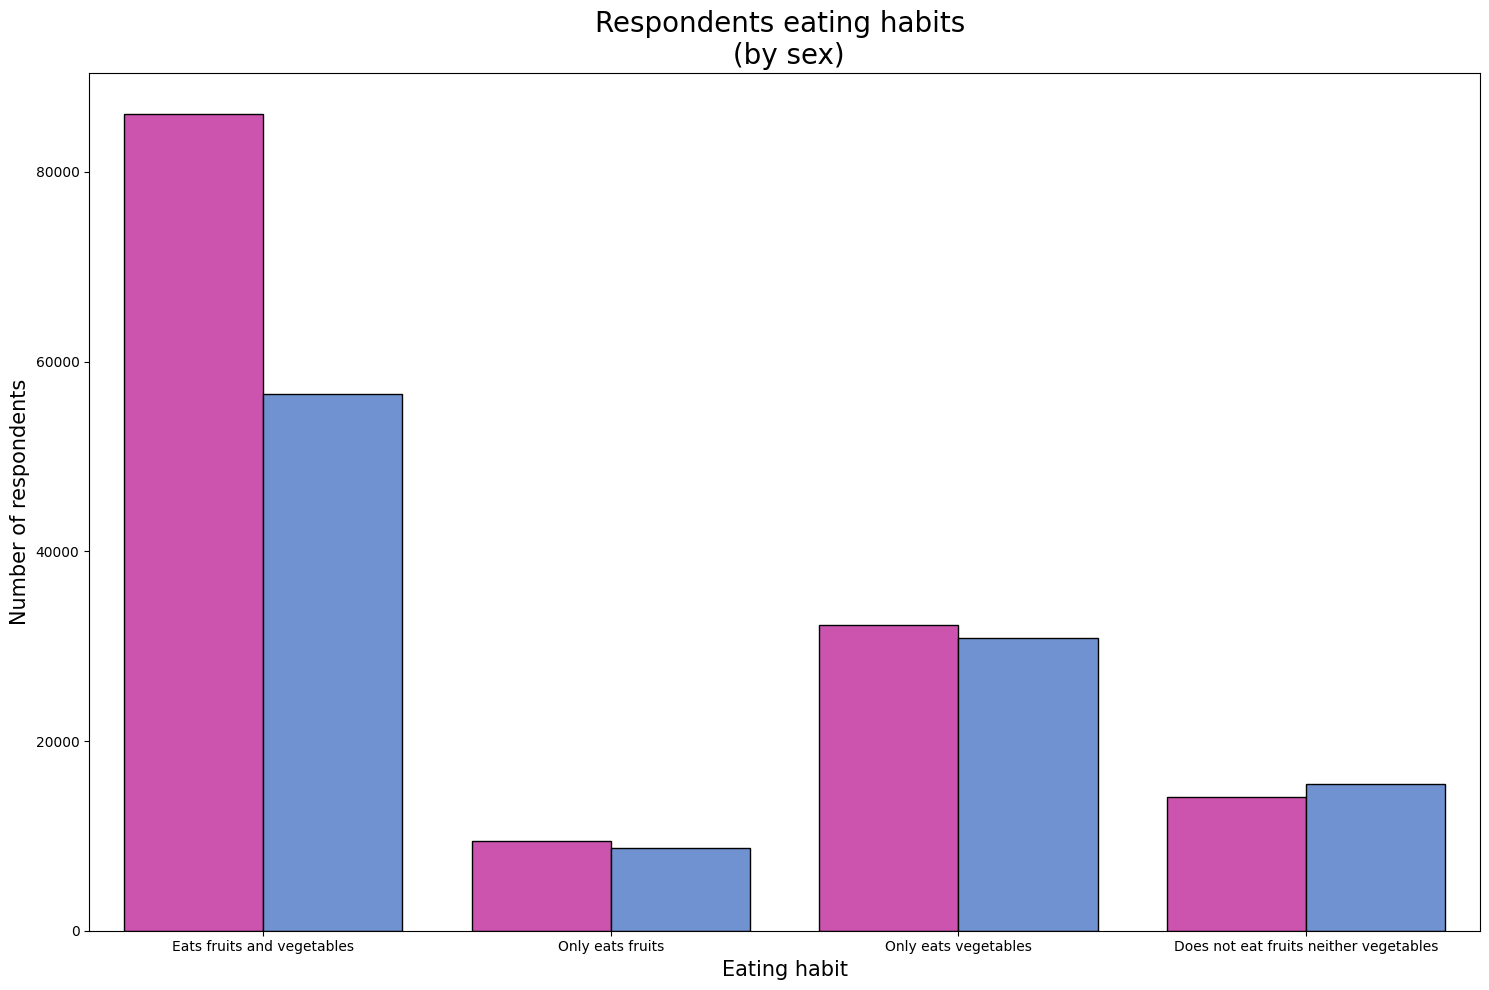

In [18]:
titles = ["Respondents who eat fruits and vegetables", "Respondents who eat only fruits", "Respondents who only eats vegetables", "Respondents who don't eat fruits neither vegetables"]
values_order = ["Eats fruits and vegetables", "Only eats fruits", "Only eats vegetables", "Does not eat fruits neither vegetables"]


f, m = sex_metrics(df, 'Sex', 'eating_habits', values_order)

for title, value in zip(titles, values_order):
    display(Markdown(f"### **{title}**"))
    show_metric("Total", round(f[value] + m[value], 2))
    show_metric("Women", f[value])
    show_metric("Men", m[value])


group = df.groupby(['Sex', 'eating_habits']).size().reset_index(name='count')

g_title = "Respondents eating habits \n (by sex)"
x_label = "Eating habit"
y_label = "Number of respondents"
colors = ['#E03FB8','#608DE0']

graph_eating_habits = Graph(graph_title=g_title,
                            xlabel_name=x_label,
                            ylabel_name=y_label,
                            colors=colors)

graph_eating_habits.bar_plot_sns(x='eating_habits', y='count', hue='Sex', order=values_order, data=group)

From the analysis of the data on fruit and vegetable consumption among the respondents, the following findings were identified:

**People who consume fruits and vegetables**.

This group represents **56.26%** of all respondents, indicating that more than half of them maintain eating habits that include both products. When separated by gender, women make up **33.96%**, outnumbering men, who account for **22.3%**.

**People who consume fruit only**.

Within this section, the total percentage drops to **7.17%**. Women again outnumber men with **3.72%** versus **3.45%**, although the gender difference is less marked compared to the previous group.

**People who consume vegetables only**.

This group includes **24.89%** of respondents. Women account for **12.71%**, while men account for only **12.17%**, showing a better balance between both genders.

**People who do not consume fruit and vegetables**

**11.69%** of respondents reported consuming neither fruit nor vegetables, a relatively low but significant proportion. Within this group, men account for **6.11%**, slightly outnumbering women, who account for **5.58%**.

**Trend analysis**

It is clear that the majority of respondents integrate fruit and vegetables into their diet, with women leading in consumption in all groups that include these foods. However, it is of concern that about **12%** of people do not consume any of these products. This suggests the need to encourage healthier eating habits, especially among men, who tend to have higher percentages in the ‘non-consumption’ category.

In [ ]:
values_order = ['Excellent',
                'Very good',
                'Good',
                'Fair',
                'Poor']
filter_order = ['Yes', 'No']
titles = ["Health status (overall) of people who were physically active in the last 30 days",
          "Health status (overall) of people who weren't physically active in the last 30 days"]


e, v_g, g, f, p = health_status_metrics(df, 'GenHlth', 'PhysActivity', values_order, filter_order)
metrics_dict = {'Excellent':e,
                'Very good':v_g,
                'Good': g,
                'Fair': f,
                'Poor': p}


for title, value in zip(titles, filter_order):
    display(Markdown(f"### **{title}**"))
    for metric in metrics_dict:
        show_metric(metric, metrics_dict[metric][value])
      


### **Health status (overall) of people who were physically active in the last 30 days**

Excellent: 15.77%

Very good: 29.03%

Good: 21.55%

Fair: 7.2%

Poor: 2.1%

### **Health status (overall) of people who weren't physically active in the last 30 days**

Excellent: 2.08%

Very good: 6.08%

Good: 8.27%

Fair: 5.25%

Poor: 2.66%